In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# CSV functions
def csv_to_dict(file):
    """
    read CSV file and create dict with key for each head containing a list of column entries for respective head
    
    :param file: path to CSV file to read
    :return: created dictionary
    """
    d = {}
    with open(file) as fin:
        reader = csv.reader(fin)
        headers = next(reader, None)
        for h in headers:
            d[h] = []
        for row in reader:
            for h, entry in zip(headers,row):
                d[h].append(entry)
    return d


def print_csv_dict(d):
    """
    print CSV dictionary in formatted way
    
    :param d: dict of CSV file to print
    :return:
    """
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(d)

In [3]:
# IMU data dict functions
def extract_acc(d):
    """
    extract acceleration vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: a (numpy array)
    """
    a = np.array(d['a'], dtype='float32')
    return a

def extract_z(d):
    """
    extract acceleration measurements for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: z (numpy array)
    """
    z = np.array(d['z'], dtype='float32')
    return z

def extract_vel(d):
    """
    extract velocity vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: v (numpy array)
    """
    v = np.array(d['v'], dtype='float32')
    return v

def extract_pos(d):
    """
    extract position vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: p (numpy array)
    """
    p = np.array(d['d'], dtype='float32')
    return p

def extract_time(d):
    """
    extract time vector for IMU data run dict (in seconds)
    
    :param d: dict of CSV file of IMU data run
    :return: time
    """
    timestamps = np.array(d['t'], dtype='float32')
    return timestamps

In [4]:
# read all data files for multi filter transformation stationary test
data_sta = []
for run in range(3):
    run_data_file = 'simulation_runs/sim_run' + str(run + 1) + '.csv'
    run_dict = csv_to_dict(run_data_file)
    data_sta.append(run_dict)

In [5]:
def plot_accs_zs(run_dicts):
    num = len(run_dicts)
    
    accs = []
    zs = []
    times = []
    for run_dict in run_dicts:
        accs.append(extract_acc(run_dict))
        zs.append(extract_z(run_dict))
        times.append(extract_time(run_dict))
    
    # plot filtered acc and measurements
    for i in range(num):
        plt.figure(figsize=(15,5))
        plt.plot(times[i], zs[i], label='unfiltered acc')
        plt.plot(times[i], accs[i], label='filtered acc')
        plt.xlabel('time [s]')
        plt.ylabel('acceleration [m/s^2]')
        plt.legend()
        plt.show()

Filtered and unfiltered acceleration for simulation runs


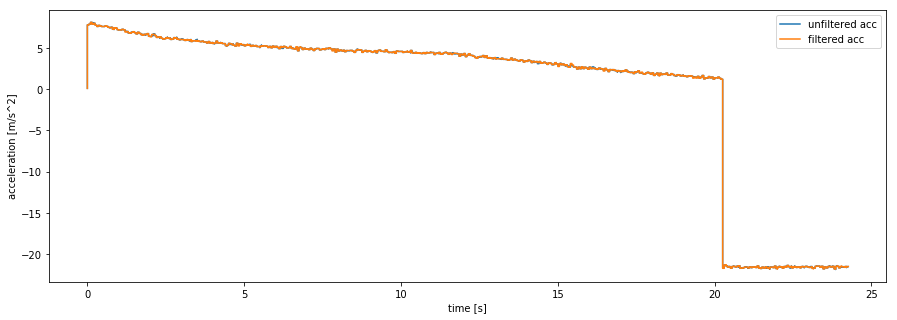

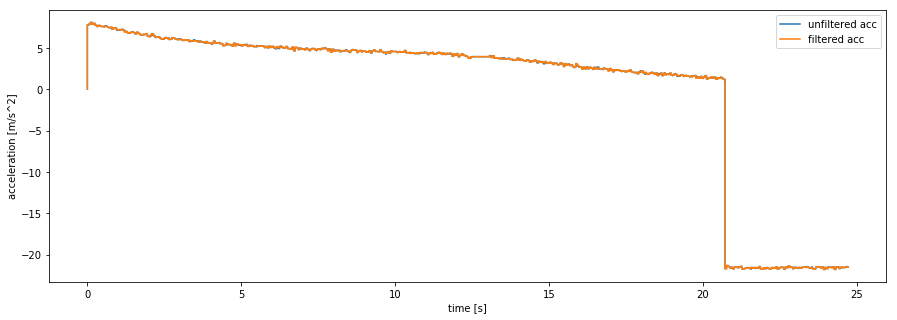

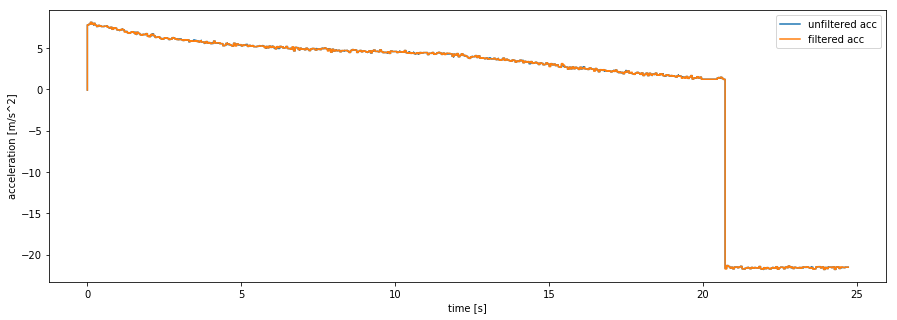

In [6]:
print("Filtered and unfiltered acceleration for simulation runs")
plot_accs_zs(data_sta)